In [2]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from collections import OrderedDict

In [11]:
## Create PINN, following from tensorflow example

class PINN(nn.Module):
    def __init__(
            self,
            N_input,
            N_hidden_arr,
            N_output,
            activation = nn.Tanh
    ):
        super(PINN, self).__init__()  # Create PINN object

        # Create input layer w/ activation function
        layers = [('Input', nn.Linear(N_input, N_hidden_arr[0]))]
        layers.append(('Input activation', activation()))

        # Create hidden layers
        for i in range(len(N_hidden_arr)-1):
            layers.append(
                ("Hidden %d" % (i+1), nn.Linear(N_hidden_arr[i], N_hidden_arr[i+1]))
            )
            layers.append(('Hidden activation %d' % (i+1), activation()))
        layers.append(('Output', nn.Linear(N_hidden_arr[-1], N_output)))
        layerdict = OrderedDict(layers)
        self.layers = nn.Sequential(layerdict)

In [12]:
test = PINN(2, [32,16,16,32], 2)
print(test.layers)

Sequential(
  (Input): Linear(in_features=2, out_features=32, bias=True)
  (Input activation): Tanh()
  (Hidden 1): Linear(in_features=32, out_features=16, bias=True)
  (Hidden activation 1): Tanh()
  (Hidden 2): Linear(in_features=16, out_features=16, bias=True)
  (Hidden activation 2): Tanh()
  (Hidden 3): Linear(in_features=16, out_features=32, bias=True)
  (Hidden activation 3): Tanh()
  (Output): Linear(in_features=32, out_features=2, bias=True)
)


In [54]:
## constant values
u0 = 1  # defining velocity, density, and viscocity for fluid
rho0 = 1
nu0 = 0.01

torch.Size([84, 2])
tensor([[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]])
torch.Size([84, 2])


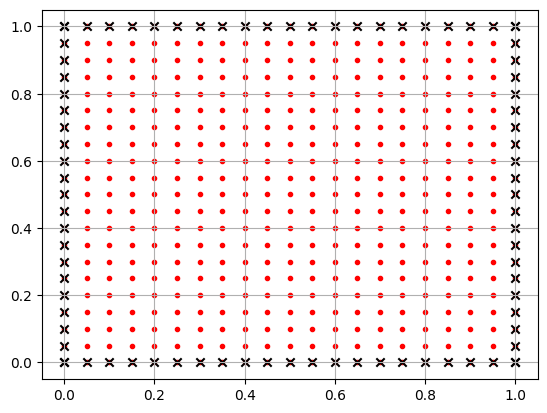

In [55]:
## Generate data, plot for sake of testing

# Create domain for collocation points
d = 0.05
x = torch.arange(0, 1+d, d)
y = torch.arange(0, 1+d, d)

# Collocation tensor
X = torch.stack(torch.meshgrid(x, y)).reshape(2,-1).T

# Get boundary conditions
b_left = torch.stack(torch.meshgrid(x[0], y)).reshape(2,-1).T  # x = 0, y = var, left wall
b_right = torch.stack(torch.meshgrid(x[-1],y)).reshape(2,-1).T
b_bottom = torch.stack(torch.meshgrid(x, y[0])).reshape(2,-1).T
b_top = torch.stack(torch.meshgrid(x, y[-1])).reshape(2,-1).T

X_train = torch.cat([b_left, b_bottom, b_right, b_top])
print(X_train.size())

## Get solutions for each boundary condition
walls_Y = torch.zeros(b_left.size())

# Get BC for lid driven component
wall_lid = torch.zeros(b_top.size()[0], b_top.size()[1])
wall_lid[:,0] = u0
print(wall_lid)

train_Y = torch.cat([walls_Y, walls_Y, walls_Y, wall_lid])
print(train_Y.size())

# Try and plot for test
plt.figure()
plt.scatter(X[:,0].numpy(), X[:,1].numpy(), marker='.', c='r')
plt.scatter(b_left[:,0].numpy(), b_left[:,1].numpy(), marker='x', c='k')
plt.scatter(b_right[:,0].numpy(), b_right[:,1].numpy(), marker='x', c='k')
plt.scatter(b_top[:,0].numpy(), b_top[:,1].numpy(), marker='x', c='k')
plt.scatter(b_bottom[:,0].numpy(), b_bottom[:,1].numpy(), marker='x', c='k')
plt.grid()
plt.show()
